# Criando os nomes

In [1]:
import pandas as pd

In [2]:
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')

In [3]:
print(f'Quantidade de nomes: {len(nomes_m) + len(nomes_f)}')

Quantidade de nomes: 400


In [4]:
frames = [nomes_m, nomes_f]

In [5]:
nomes = pd.concat(frames)['nome'].to_frame()

In [6]:
nomes.sample(5)

,nome
125,VALMIR
57,DAIANE
9,ALINE
86,CRISTINA
22,VITORIA


# Incluindo ID dos alunos

In [7]:
import numpy as np
np.random.seed(123)

In [8]:
total_alunos = len(nomes)
total_alunos

400

In [9]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [10]:
nomes.sample(5)

,nome,id_aluno
188,VALDECIR,369
57,IGOR,303
3,ANTONIA,382
182,LIDIANE,33
30,ELIANE,111


In [11]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [12]:
nomes.sample(5)

,nome,id_aluno,dominio
84,FATIMA,78,@dominiodoemail.com.br
0,MARIA,331,@servicodoemail.com
179,LILIANE,340,@dominiodoemail.com.br
10,LUIS,174,@dominiodoemail.com.br
171,VALDEMIR,45,@dominiodoemail.com.br


In [13]:
nomes['email'] = nomes['nome'].str.cat(nomes['dominio']).str.lower()

In [14]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ELZA,320,@dominiodoemail.com.br,elza@dominiodoemail.com.br
57,IGOR,303,@servicodoemail.com,igor@servicodoemail.com
85,FABRICIO,221,@dominiodoemail.com.br,fabricio@dominiodoemail.com.br
183,MARLON,8,@dominiodoemail.com.br,marlon@dominiodoemail.com.br
189,WESLEI,137,@dominiodoemail.com.br,weslei@dominiodoemail.com.br


# Criando a tabela Cursos

In [15]:
import html5lib

In [16]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [17]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [18]:
type(cursos)

list

In [19]:
cursos = cursos[0]

In [20]:
type(cursos)

pandas.core.frame.DataFrame

In [21]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o indexde cursos

In [22]:
cursos.rename(columns={'Nome do curso': 'nome_do_curso'}, inplace=True)

In [23]:
cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [24]:
cursos['id'] = cursos.index + 1

In [25]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [26]:
cursos.set_index('id', inplace=True)

In [27]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [28]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,MANUEL,83,@dominiodoemail.com.br,manuel@dominiodoemail.com.br
172,WANDERSON,165,@servicodoemail.com,wanderson@servicodoemail.com
130,ELIZABETE,184,@dominiodoemail.com.br,elizabete@dominiodoemail.com.br
70,ISABELA,248,@servicodoemail.com,isabela@servicodoemail.com
171,TERESINHA,3,@dominiodoemail.com.br,teresinha@dominiodoemail.com.br


In [29]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [30]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
133,BRENDA,130,@servicodoemail.com,brenda@servicodoemail.com,1
44,GERALDO,259,@servicodoemail.com,geraldo@servicodoemail.com,1
50,VINICIUS,27,@dominiodoemail.com.br,vinicius@dominiodoemail.com.br,1


In [31]:
nomes.matriculas.describe()

count    400.000000
mean       2.147500
std        1.619352
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [32]:
import seaborn as sns

<AxesSubplot:xlabel='matriculas', ylabel='Density'>

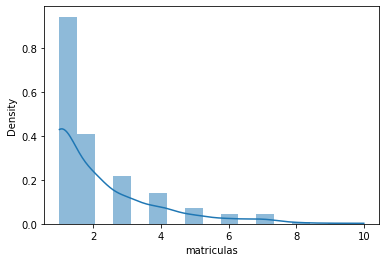

In [33]:
# sns.distplot(nomes.matriculas) -> Deprecated, solution -> https://stackoverflow.com/questions/65973224/updating-seaborn-distplot-code-to-version-0-11
sns.histplot(nomes.matriculas, kde=True, stat="density", linewidth=0)

In [34]:
nomes.matriculas.value_counts()

1     200
2      87
3      46
4      30
5      15
6       9
7       9
8       2
9       1
10      1
Name: matriculas, dtype: int64

# Selecionando cursos

In [35]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
97,OSVALDO,201,@servicodoemail.com,osvaldo@servicodoemail.com,1
170,MARINALVA,341,@servicodoemail.com,marinalva@servicodoemail.com,1
197,LUCIANE,323,@dominiodoemail.com.br,luciane@dominiodoemail.com.br,2
196,IVONETE,99,@servicodoemail.com,ivonete@servicodoemail.com,1
138,CLEBER,75,@dominiodoemail.com.br,cleber@dominiodoemail.com.br,2


In [36]:
todas_matriculas = []
x = np.random.rand(len(cursos))
prob = x / sum(x)

In [37]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p=prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno', 'id_curso'])

In [38]:
matriculas.head()

,id_aluno,id_curso
0,235,6
1,235,16
2,43,6
3,43,11
4,43,12


In [39]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python
6,75,PHP com MySql
7,32,.NET para web
8,18,Novas integrações com Java
9,59,TDD com Java


In [40]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
195,ROSANE,231,@dominiodoemail.com.br,rosane@dominiodoemail.com.br,2
90,FABIANO,213,@servicodoemail.com,fabiano@servicodoemail.com,1
191,TERESA,124,@dominiodoemail.com.br,teresa@dominiodoemail.com.br,1


In [41]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [42]:
matriculas.head()

,id_aluno,id_curso
0,235,6
1,235,16
2,43,6
3,43,11
4,43,12


In [43]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

In [44]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python


# Saída em diferentes formatos

In [45]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [46]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,59,Lógica de programação
1,31,Java para Web
2,53,C# para Web
3,4,Ruby on Rails
4,12,Cursos de Python
5,75,PHP com MySql
6,32,.NET para web
7,18,Novas integrações com Java
8,59,TDD com Java
9,40,Código limpo com C#


In [47]:
matriculas_json = matriculas_por_curso.to_json()

In [48]:
matriculas_json

'{"quantidade_de_alunos":{"1":59,"2":31,"3":53,"4":4,"5":12,"6":75,"7":32,"8":18,"9":59,"10":40,"11":61,"12":66,"13":14,"14":27,"15":46,"16":43,"17":56,"18":53,"19":75,"20":35},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [49]:
matriculas_html = matriculas_por_curso.to_html()

In [50]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>59</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>31</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>53</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>12</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>75</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>32</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>18</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>59</td>
 

# Criando o banco sql

In [51]:
from sqlalchemy import create_engine, MetaData, Table

In [52]:
engine = create_engine('sqlite:///:memory:')

In [53]:
engine

Engine(sqlite:///:memory:)

In [54]:
type(engine)

sqlalchemy.engine.base.Engine

In [55]:
matriculas_por_curso.to_sql('matriculas', engine)

In [56]:
# print(engine.table_names()) -> Deprecated
def print_table_names():
    metadata = MetaData()
    metadata.reflect(bind=engine)
    print(list(metadata.tables.keys()))
print_table_names()

['matriculas']


# Buscando do banco sql

In [57]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [58]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,4,4,Ruby on Rails
1,5,12,Cursos de Python
2,8,18,Novas integrações com Java
3,13,14,Persistência com .NET


In [59]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,59
1,Java para Web,31
2,C# para Web,53
3,Ruby on Rails,4
4,Cursos de Python,12
5,PHP com MySql,75
6,.NET para web,32
7,Novas integrações com Java,18
8,TDD com Java,59
9,Código limpo com C#,40


In [60]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [61]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 70')

In [62]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
5,PHP com MySql,75
18,Boas práticas em Java,75


# Escrevendo no banco

In [63]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [64]:
print_table_names()

['matriculas', 'muitas_matriculas']


# Nomes dos alunos e alunas da próxima turma

In [66]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python
6,75,PHP com MySql
7,32,.NET para web
8,18,Novas integrações com Java
9,59,TDD com Java


In [67]:
matriculas

,id_aluno,id_curso
0,235,6
1,235,16
2,43,6
3,43,11
4,43,12
...,...,...
854,383,12
855,366,1
856,366,19
857,366,10


In [70]:
id_curso = 16 # Estatística básica
proxima_turma = matriculas.query(f'id_curso == {id_curso}')
proxima_turma

,id_aluno,id_curso
1,235,16
6,304,16
13,55,16
23,218,16
44,80,16
95,259,16
136,21,16
150,108,16
176,179,16
183,275,16


In [71]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
137,AUGUSTO,129,@servicodoemail.com,augusto@servicodoemail.com,2
199,NILZA,366,@servicodoemail.com,nilza@servicodoemail.com,4
54,MARIO,281,@dominiodoemail.com.br,mario@dominiodoemail.com.br,1


In [74]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
5,16,JOSUE,@dominiodoemail.com.br,josue@dominiodoemail.com.br,4
21,16,CICERO,@servicodoemail.com,cicero@servicodoemail.com,4
36,16,NILTON,@dominiodoemail.com.br,nilton@dominiodoemail.com.br,1
48,16,MARILIA,@servicodoemail.com,marilia@servicodoemail.com,1
55,16,PEDRO,@dominiodoemail.com.br,pedro@dominiodoemail.com.br,3
80,16,ANDRE,@servicodoemail.com,andre@servicodoemail.com,4
108,16,CAIO,@servicodoemail.com,caio@servicodoemail.com,7
110,16,BARBARA,@servicodoemail.com,barbara@servicodoemail.com,3
110,16,BARBARA,@servicodoemail.com,barbara@servicodoemail.com,3


In [77]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
5          JOSUE
21        CICERO
36        NILTON
48       MARILIA
55         PEDRO
80         ANDRE
108         CAIO
110      BARBARA
110      BARBARA
148       GILSON
149        HELIO
153        JAIME
162       AMANDA
164       REGINA
170       TEREZA
179      EMERSON
196      ANDREIA
202       ISMAEL
208     PATRICIA
214    CONCEICAO
218      GABRIEL
222      ARLINDO
235         JOSE
251     CRISTINA
255        CELIA
259      GERALDO
266      GEOVANA
275        RENAN
279       SAMARA
304      ANTONIO
320         ELZA
340      LILIANE
346     NATANAEL
354       INGRID
364       DEBORA
369     VALDECIR
377        DIOGO
385        KELLY
389      CHARLES
390        ALINE
392        MARLI
398         IARA
399       ISRAEL
Name: nome, dtype: object

In [78]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
5,JOSUE
21,CICERO
36,NILTON
48,MARILIA
55,PEDRO
80,ANDRE
108,CAIO
110,BARBARA
110,BARBARA


In [82]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [83]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [84]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [85]:
proxima_turma

,nome
id_aluno,
5,JOSUE
21,CICERO
36,NILTON
48,MARILIA
55,PEDRO
80,ANDRE
108,CAIO
110,BARBARA
110,BARBARA


In [89]:
proxima_turma.rename(columns={'nome': f'Alunos do curso de {nome_curso}'}, inplace=True)
proxima_turma.sample(5)

,Alunos do curso de Estatística básica
id_aluno,
110,BARBARA
36,NILTON
320,ELZA
275,RENAN
48,MARILIA


# Excel

In [90]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [91]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,JOSUE
1,CICERO
2,NILTON
3,MARILIA
4,PEDRO
5,ANDRE
6,CAIO
7,BARBARA
8,BARBARA
9,GILSON
